# **To-Do**
1. Test PCA with sharpened data
2. Test Feature selection on PCs

Add in F1 Score & Confusion matrix
Implement GridSV

In [0]:
# a = []
# while(1):
#     a.append('1')

# **Importing of Libraries**

In [2]:
import torchvision
from PIL import Image

import pandas as pd
import numpy as np
import scipy as sp
from scipy import ndimage
from scipy.stats import norm
import scipy.signal as sig

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from skimage import io
from skimage.feature import hog
from sklearn.svm import SVC

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline

# **Downloading of Data Set**

In [4]:
# download the Fashion MNIST training data
train_dataset = torchvision.datasets.FashionMNIST(root='./', train=True, download=True)

# download the Fashion MNIST evaluation data
eval_dataset = torchvision.datasets.FashionMNIST(root='./', train=False, download=True)

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!





In [0]:
labels_dict = {0: "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

#**Checking Data**

In [6]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [7]:
eval_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test

Label 9 Ankle boot


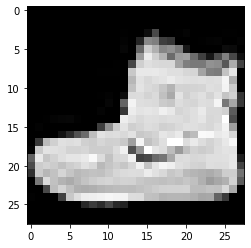

In [8]:
image_1, label_1 = train_dataset[0]
imshow(np.asarray(image_1),cmap='gray')
print("Label",label_1,labels_dict[label_1])

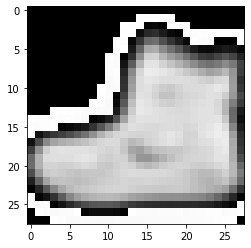

In [9]:
blurred_f = ndimage.gaussian_filter(image_1, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

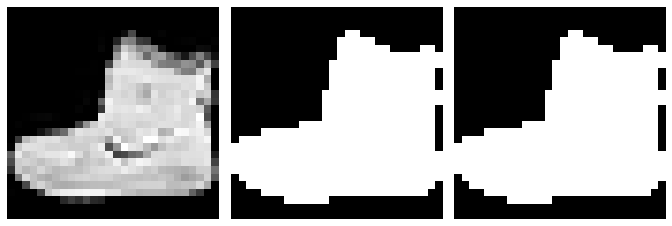

In [10]:
open_square = ndimage.binary_opening(image_1)

eroded_square = ndimage.binary_erosion(image_1)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_1)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_1, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

In [11]:
sx = ndimage.sobel(image_1, axis=0, mode='constant')
sy = ndimage.sobel(image_1, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_1, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob, cmap='gray')
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_1 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_1, axis=0, mode='constant')
sy = ndimage.sobel(image_1, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

ValueError: ignored

<Figure size 1152x360 with 4 Axes>

Testing Sharpened + Sobel filter

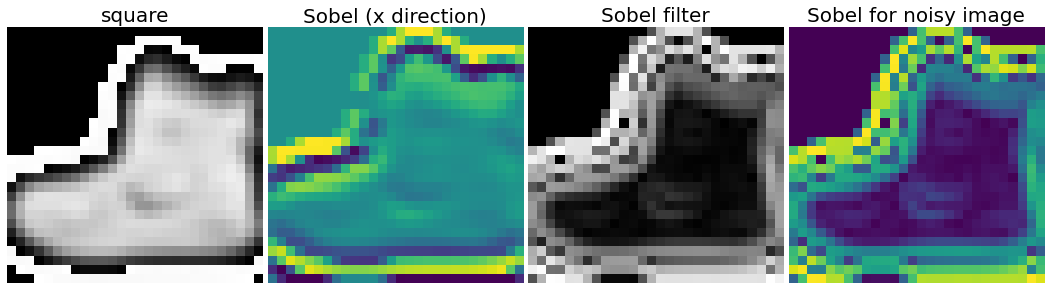

In [12]:
sharpened_test = sharpened.astype('float')

sx = ndimage.sobel(sharpened_test, axis=0, mode='constant')
sy = ndimage.sobel(sharpened_test, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(sharpened_test, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob, cmap='gray')
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

sharpened_test += 0.07*np.random.random((28,28))

sx = ndimage.sobel(sharpened_test, axis=0, mode='constant')
sy = ndimage.sobel(sharpened_test, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

Label 8 Bag


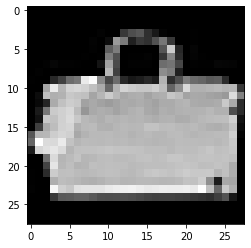

In [13]:
image_2, label_2 = train_dataset[99]
imshow(np.asarray(image_2),cmap='gray')
print("Label",label_2,labels_dict[label_2])

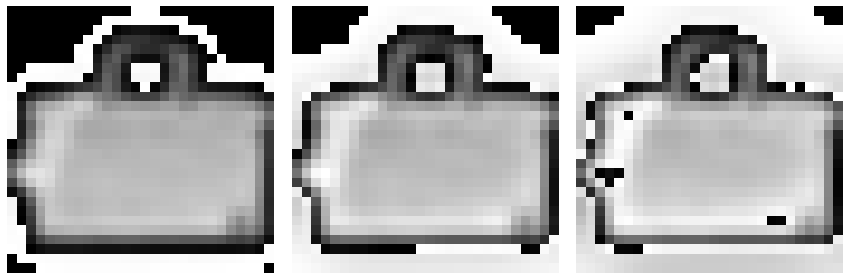

In [14]:
blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened_1 = blurred_f + alpha * (blurred_f - filter_blurred_f)

blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 2)
alpha = 1
sharpened_2 = blurred_f + alpha * (blurred_f - filter_blurred_f)

blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 3)
alpha = 1
sharpened_3 = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(sharpened_1, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(sharpened_2, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened_3, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

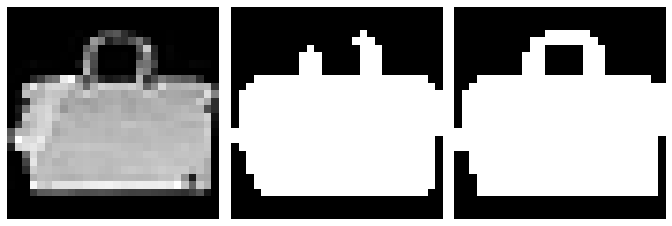

In [15]:
open_square = ndimage.binary_opening(image_2)

eroded_square = ndimage.binary_erosion(image_2)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_2)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_2, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

In [16]:
sx = ndimage.sobel(image_2, axis=0, mode='constant')
sy = ndimage.sobel(image_2, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_2, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_2 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_2, axis=0, mode='constant')
sy = ndimage.sobel(image_2, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

ValueError: ignored

<Figure size 1152x360 with 4 Axes>

Label 6 Shirt


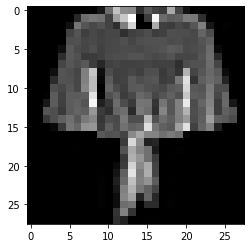

In [17]:
image_3, label_3 = train_dataset[402]
imshow(np.asarray(image_3),cmap='gray')
print("Label",label_3,labels_dict[label_3])

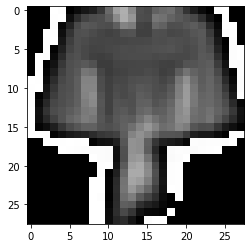

In [18]:
blurred_f = ndimage.gaussian_filter(image_3, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

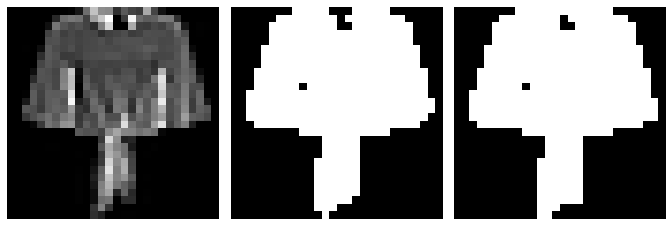

In [19]:
open_square = ndimage.binary_opening(image_3)

eroded_square = ndimage.binary_erosion(image_3)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_3)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_3, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

In [20]:
sx = ndimage.sobel(image_3, axis=0, mode='constant')
sy = ndimage.sobel(image_3, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_3, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_3 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_3, axis=0, mode='constant')
sy = ndimage.sobel(image_3, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

ValueError: ignored

<Figure size 1152x360 with 4 Axes>

Label 2 Pullover


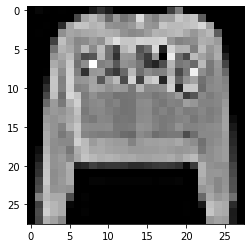

In [21]:
image_4, label_4 = train_dataset[20432]
imshow(np.asarray(image_4),cmap='gray')
print("Label",label_4,labels_dict[label_4])

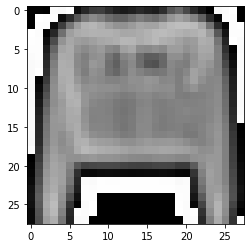

In [22]:
blurred_f = ndimage.gaussian_filter(image_4, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

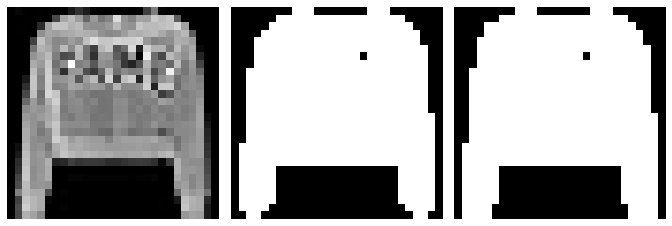

In [23]:
open_square = ndimage.binary_opening(image_4)

eroded_square = ndimage.binary_erosion(image_4)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_4)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_4, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

In [24]:
sx = ndimage.sobel(image_4, axis=0, mode='constant')
sy = ndimage.sobel(image_4, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_4, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_4 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_4, axis=0, mode='constant')
sy = ndimage.sobel(image_4, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

ValueError: ignored

<Figure size 1152x360 with 4 Axes>

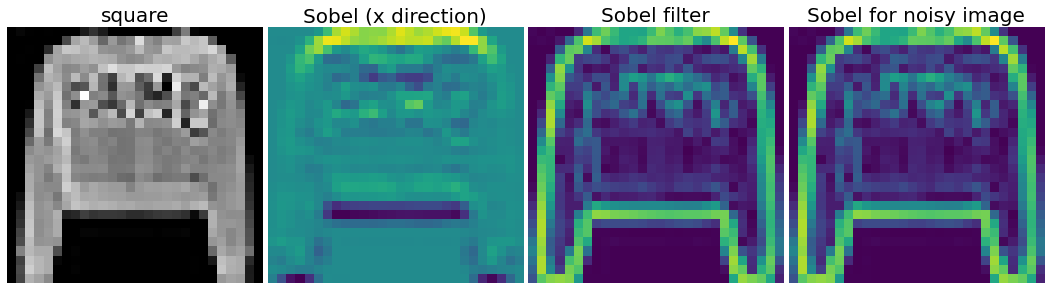

In [25]:
sx = ndimage.sobel(image_4, axis=0, mode='constant')
sy = ndimage.sobel(image_4, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_4, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_4 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_4, axis=0, mode='constant')
sy = ndimage.sobel(image_4, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

# **Preparing Data**
Creating Dataframes

In [0]:
train_images = train_dataset.data.numpy().reshape(-1,28*28)
train_labels = train_dataset.targets.data.numpy()

In [27]:
train_images.shape

(60000, 784)

In [28]:
train_labels.shape

(60000,)

In [0]:
train_labels_df = pd.DataFrame(train_labels,columns=["class"])

In [30]:
train_labels_df.head()

,class
0,9
1,0
2,0
3,3
4,0


In [0]:
eval_images = eval_dataset.data.numpy().reshape(-1,28*28)
eval_labels = eval_dataset.targets.data.numpy()

In [32]:
eval_images.shape

(10000, 784)

In [33]:
eval_labels.shape

(10000,)

In [0]:
eval_labels_df = pd.DataFrame(eval_labels,columns=["class"])

In [35]:
eval_labels_df.head()

,class
0,9
1,2
2,1
3,1
4,6


# **1. SVM with PCA**

In [0]:
pca = PCA()

pca.n_components = 2

# Scale data and apply PCA
standardized_train_images = StandardScaler().fit_transform(train_images)
pca_train_images = pca.fit_transform(standardized_train_images)

# Do the same for Evaluation data
standardized_eval_images = StandardScaler().fit_transform(eval_images)
pca_eval_images = pca.fit_transform(standardized_eval_images)

In [0]:
svm = SVC(kernel='linear', random_state=42)
# pca_train_images_df = pd.DataFrame(pca_train_images,columns=("1st principal","2nd principal"))

In [47]:
svm.fit(pca_train_images,train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred_1 = svm.predict(pca_eval_images)

In [49]:
y_pred_1

array([7, 2, 1, ..., 0, 1, 5])

In [50]:
eval_labels

array([9, 2, 1, ..., 8, 1, 5])

In [51]:
print('Model classification accuracy: {}%'.format(str(metrics.accuracy_score(eval_labels, y_pred_1) * 100)))

Model classification accuracy: 51.39%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: No contour levels were found within the data range.


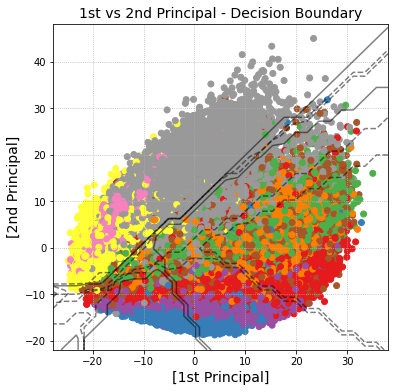

In [52]:
# init the plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot sepal length vs. petal length and corresponding classes
ax.scatter(pca_train_images[:,0], pca_train_images[:,1], c=train_labels, cmap=plt.cm.Set1)

# determine axis ranges
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create meshgrid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)

# print(XX.shape)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# print(svm.decision_function(xy)[0])

# determine and plot decision boundary
Z = svm.decision_function(xy)

# print(svm.decision_function(xy)[:,1].reshape(XX.shape).shape)

for i in range(1,10):
  temp = Z[:,i].reshape(XX.shape)
  ax.contour(XX, YY, temp , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# add axis legends
ax.set_xlabel("[1st Principal]", fontsize=14)
ax.set_ylabel("[2nd Principal]", fontsize=14)

# add plot title
plt.title('1st vs 2nd Principal - Decision Boundary', fontsize=14);

##**Testing for the optimal number of PCA Components**

In [0]:
pca = PCA()

pca_train_images_array = []
pca_eval_images_array = []

for i in range(2,25,2):

  pca.n_components = i

  # Scale data and apply PCA
  standardized_train_images = StandardScaler().fit_transform(train_images)
  pca_train_images_array.append(pca.fit_transform(standardized_train_images))

  # Do the same for Evaluation data
  standardized_eval_images = StandardScaler().fit_transform(eval_images)
  pca_eval_images_array.append(pca.fit_transform(standardized_eval_images))

In [0]:
svm = SVC(kernel='linear', random_state=42)

In [0]:
pca_test_result = []

for i in range(0,len(pca_train_images_array)):

  svm.fit(pca_train_images_array[i],train_labels)
  y_pred_temp = svm.predict(pca_eval_images_array[i])
  pca_test_result.append(metrics.accuracy_score(eval_labels, y_pred_temp) * 100)

In [56]:
pca_test_result

[67.83,
 72.76,
 74.44,
 75.87,
 71.92,
 70.92,
 71.78999999999999,
 72.8,
 69.89999999999999,
 69.41000000000001,
 66.03999999999999]

Text(0.5, 1.0, 'Number of PCA Components')

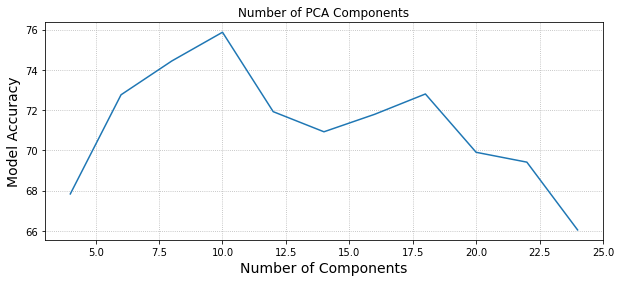

In [58]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

ax.grid(linestyle="dotted")

ax.plot(range(2,25,2),pca_test_result)

ax.set_xlabel("Number of Components", fontsize=14)
ax.set_ylabel("Model Accuracy", fontsize=14)

plt.title("Number of PCA Components")

##**Testing for optimal C**

In [0]:
pca = PCA()

pca.n_components = 10

# Scale data and apply PCA
standardized_train_images = StandardScaler().fit_transform(train_images)
pca_train_images = pca.fit_transform(standardized_train_images)

# Do the same for Evaluation data
standardized_eval_images = StandardScaler().fit_transform(eval_images)
pca_eval_images = pca.fit_transform(standardized_eval_images)

In [0]:
# init distinct C values
# C_values = [0.001, 0.01 ,0.1, 1, 5, 10, 100, 1000, 10000]
C_values = [1000, 10000]
c_test_result = []

for c in C_values:
  svm = SVC(kernel='linear', C=c, random_state=42)
  svm.fit(pca_train_images,train_labels)
  y_pred_temp = svm.predict(pca_eval_images)
  c_test_result.append(metrics.accuracy_score(eval_labels, y_pred_temp) * 100)
  print("------------------------------------ C =",c,"-------------------------------------------")
  print('Model classification accuracy: {}%'.format(str(metrics.accuracy_score(eval_labels, y_pred_temp) * 100)))
  f1 = f1_score(eval_labels, y_pred_temp,average='micro')
  print('F1 score: %f' % f1)
  print("*************************************************************************************")

In [0]:
c_test_result

In [0]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

ax.grid(linestyle="dotted")

ax.plot(C_values,c_test_result)

ax.set_xlabel("C Values", fontsize=14)
ax.set_ylabel("Model Accuracy", fontsize=14)

plt.title("Optimal C Value")

## **Testing for Optimal Kernal**

In [0]:
# init distinct kernel types
kernel_types = ['linear','rbf','poly']

# RBF tunes gamma
# Poly tunes degree

In [0]:
pca = PCA()

pca.n_components = 10

# Scale data and apply PCA
standardized_train_images = StandardScaler().fit_transform(train_images)
pca_train_images = pca.fit_transform(standardized_train_images)

# Do the same for Evaluation data
standardized_eval_images = StandardScaler().fit_transform(eval_images)
pca_eval_images = pca.fit_transform(standardized_eval_images)

In [0]:
kernel_test_result = []

for kernel_type in kernel_types:
  svm = SVC(kernel=kernel_type, C=0.1, random_state=42)
  svm.fit(pca_train_images,train_labels)
  y_pred_temp = svm.predict(pca_eval_images)
  kernel_test_result.append(metrics.accuracy_score(eval_labels, y_pred_temp) * 100)
  print("------------------------------------ Kernel =",kernel_type,"-------------------------------------------")
  print('Model classification accuracy: {}%'.format(str(metrics.accuracy_score(eval_labels, y_pred_temp) * 100)))
  f1 = f1_score(eval_labels, y_pred_temp,average='micro')
  print('F1 score: %f' % f1)
  print("*************************************************************************************")

In [0]:
kernel_test_result

In [0]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

ax.grid(linestyle="dotted")

ax.plot(kernel_types,kernel_test_result)

ax.set_xlabel("Kernel Types", fontsize=14)
ax.set_ylabel("Model Accuracy", fontsize=14)

plt.title("Number of PCA Components")

## **Tuning RBF Gamma**

In [0]:
pca = PCA()

pca.n_components = 10

# Scale data and apply PCA
standardized_train_images = StandardScaler().fit_transform(train_images)
pca_train_images = pca.fit_transform(standardized_train_images)

# Do the same for Evaluation data
standardized_eval_images = StandardScaler().fit_transform(eval_images)
pca_eval_images = pca.fit_transform(standardized_eval_images)

In [0]:
gammas = [0.0000001, 0.00001, 0.001, 0.1, 1]

gamma_test_result = []

for gamma in gammas:
  svm = SVC(kernel='rbf', C=0.1, gamma=gamma, random_state=42)
  svm.fit(pca_train_images,train_labels)
  y_pred_temp = svm.predict(pca_eval_images)
  gamma_test_result.append(metrics.accuracy_score(eval_labels, y_pred_temp) * 100)
  print("------------------------------------ Gamma =", gamma,"-------------------------------------------")
  print('Model classification accuracy: {}%'.format(str(metrics.accuracy_score(eval_labels, y_pred_temp) * 100)))
  f1 = f1_score(eval_labels, y_pred_temp,average='micro')
  print('F1 score: %f' % f1)
  print("*************************************************************************************")

In [0]:
gamma_test_result

# **2. SVM without treating data**

In [0]:
svm = SVC(kernel='poly', C=0.1, random_state=42)

In [0]:
svm.fit(train_images,train_labels)

In [0]:
y_pred_1 = svm.predict(eval_images)

In [0]:
print('Model classification accuracy: {}%'.format(str(metrics.accuracy_score(eval_labels, y_pred_1) * 100)))

In [0]:
mat = confusion_matrix(eval_labels, y_pred_1)

# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=labels_dict, yticklabels=labels_dict)

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

In [0]:
# # precision tp / (tp + fp)
# precision = precision_score(eval_labels, y_pred_1,average='macro')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(eval_labels, y_pred_1,average='macro')
# print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(eval_labels, y_pred_1,average='micro')
print('F1 score: %f' % f1)

# **X. SVM with TSNE (Try running it another time)**

In [0]:
from sklearn.manifold import TSNE

# model = TSNE(random_state=0)
# model.n_component = 2

# tsne_train_images = model.fit_transform(standardized_train_images)
# tsne_eval_images = model.fit_transform(standardized_eval_images)